In [95]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# style of plots
sns.set_style("darkgrid")

In [4]:
# data loading
df = pd.read_json('Dashmote_data_set_case.json', lines=True)

In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
cluster          10000 non-null object
comments         10000 non-null int64
date_formated    10000 non-null object
date_month       10000 non-null int64
date_unix        10000 non-null int64
date_week        10000 non-null int64
hashtags         10000 non-null object
id               10000 non-null object
likes            10000 non-null int64
url              10000 non-null object
user_id          10000 non-null int64
dtypes: int64(6), object(5)
memory usage: 859.5+ KB


In [6]:
# changing date_month to months(Jan, Feb, Mar, ..)
dmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['date_month'] = df['date_month'].map(dmap)

df.head()

,cluster,comments,date_formated,date_month,date_unix,date_week,hashtags,id,likes,url,user_id
0,buzzcut,19,01-01-2017,Jan,1483292238,52,"[#shooting, #photography, #studiophotography, ...",BOuvqVnA8or,269,https://scontent-vie1-1.cdninstagram.com/t51.2...,2963637811
1,chignon,38,01-01-2017,Jan,1483293222,52,"[#chignon, #insta, #instapic, #liveyourlife, #...",BOuxiZXBee-,222,https://scontent-vie1-1.cdninstagram.com/t51.2...,2897380111
2,wetlook,15,01-01-2017,Jan,1483305481,52,"[#happynewyear, #magic, #christmas, #look, #ch...",BOvI621jm4n,182,https://scontent-vie1-1.cdninstagram.com/t51.2...,190130788
3,hairflip,18,01-01-2017,Jan,1483310388,52,"[#2017whatsgood, #nyc, #nye, #toshi, #firstNYE...",BOvSR4OgxAq,112,https://scontent-vie1-1.cdninstagram.com/t51.2...,181138901
4,halfupdo,28,01-01-2017,Jan,1483294337,52,"[#braidphoto, #velvetdress, #braidideas, #hair...",BOuzqkSAO_7,174,https://scontent-vie1-1.cdninstagram.com/t51.2...,1963048049


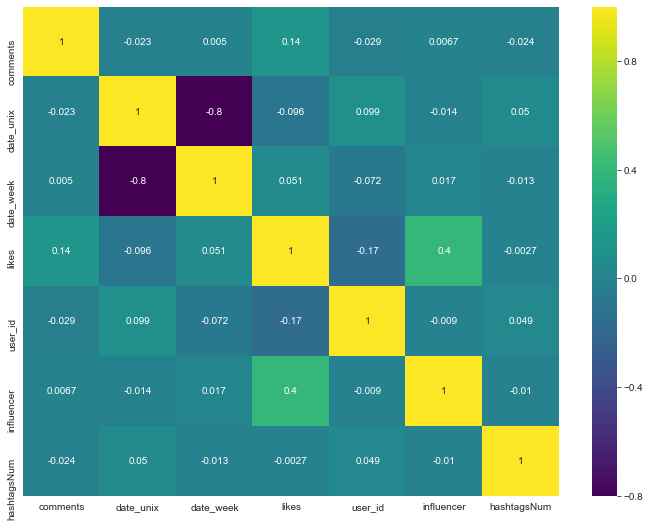

In [74]:
# heatmap (interesting correlations: likes-comments, likes-date_week, comments-date_week)
# correlations with date would be better if there are more data for different dates...
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [8]:
# num of different hairstyles
df['cluster'].nunique()

124

In [9]:
# add influencer column (true if likes > 500, else false)
def isInfluencer(likes):
    return likes > 500

df['influencer'] = df['likes'].apply(lambda var: isInfluencer(var))

# show all influencers
df[df['influencer']==True]

,cluster,comments,date_formated,date_month,date_unix,date_week,hashtags,id,likes,url,user_id,influencer
8,grayhairdontcare,19,01-01-2017,Jan,1483294424,52,"[#UniGirls, #StarLaceFrontWig, #UniWigsTrendyT...",BOuz1NDlRok,2808,https://scontent-vie1-1.cdninstagram.com/t51.2...,355426846,True


In [10]:
# top 10 hairstyles by number of pictures
df['cluster'].value_counts().head(10)

foils                  724
balayagedandpainted    700
hairflip               441
moisture               420
mermaidians            389
buzzcut                352
shadowroot             339
chignon                338
strawberryblonde       336
fishtailbraid          334
Name: cluster, dtype: int64

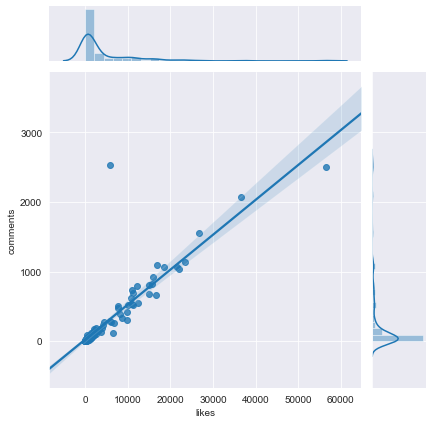

In [79]:
# total number of comments and likes for each different hairstyle
clusters = df.groupby('cluster').sum()[['comments', 'likes']]
sns.jointplot(x='likes', y='comments', data=clusters, kind='reg')

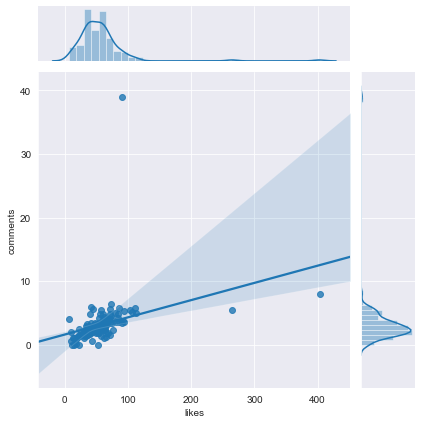

In [80]:
# average number of comments and likes for each different hairstyle
avgClusters = df.groupby('cluster').mean()[['comments', 'likes']]
sns.jointplot(x='likes', y='comments', data=avgClusters, kind='reg')

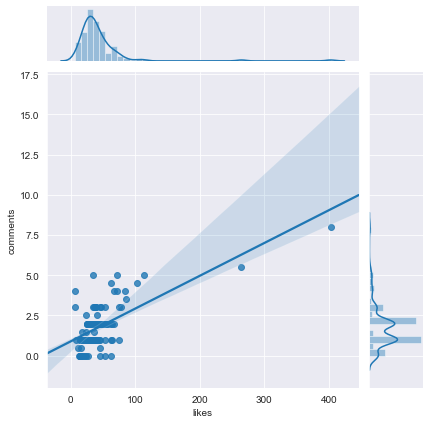

In [81]:
# median number of comments and likes for each different hairstyle
medianClusters = df.groupby('cluster').median()[['comments', 'likes']]
sns.jointplot(x='likes', y='comments', data=medianClusters, kind='reg')

In [15]:
# top 10 different hairstyles by number of likes
df.groupby('cluster').sum()[['likes']].nlargest(10, 'likes')

,likes
cluster,
balayagedandpainted,56438
mermaidians,36662
hairflip,26798
buzzcut,23502
foils,22130
retrohair,21527
grannyhair,18534
fishtailbraid,16819
wetlook,16699


In [16]:
# top 10 different hairstyles by number of comments
df.groupby('cluster').sum()[['comments']].nlargest(10, 'comments')

,comments
cluster,
babyblonde,2536
balayagedandpainted,2506
mermaidians,2073
hairflip,1548
buzzcut,1136
fishtailbraid,1095
retrohair,1068
grannyhair,1062
foils,1037


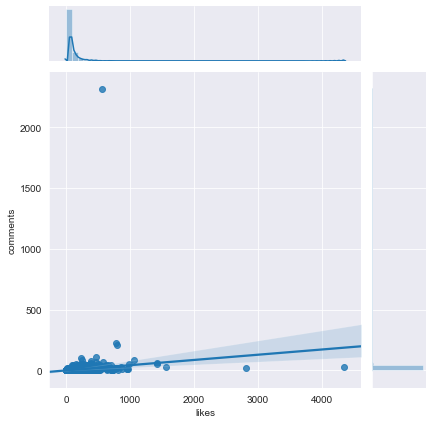

In [82]:
# comments and likes for each different user
users = df.groupby('user_id').sum()[['comments', 'likes']]
sns.jointplot(x='likes', y='comments', data=users, kind='reg')

In [18]:
# top 10 users by total number of likes
df.groupby('user_id').sum()[['likes']].nlargest(10, 'likes')

,likes
user_id,
1073489432,4354
355426846,2808
4232945658,1558
302277832,1421
176521953,1414
1476033788,1066
2827398147,986
5750112,957
3998524189,954


In [19]:
# top 10 users by average number of likes
df.groupby('user_id').mean()[['likes']].nlargest(10, 'likes')

,likes
user_id,
355426846,2808.0
205763024,499.0
320271530,499.0
22745026,496.0
1083368723,496.0
177486984,493.0
6059785,490.0
1187074593,486.0
478351358,481.0


In [20]:
# top 10 users by total number of comments
df.groupby('user_id').sum()[['comments']].nlargest(10, 'comments')

,comments
user_id,
1456922875,2315
193418141,229
10780551,209
1539892852,108
1318009535,101
1476033788,86
1422116986,83
271782646,74
1950777039,72


In [21]:
# top 10 users by average number of comments
df.groupby('user_id').mean()[['comments']].nlargest(10, 'comments')

,comments
user_id,
1456922875,1157.500000
1318009535,101.000000
1422116986,83.000000
193418141,76.333333
271782646,74.000000
2311899128,64.000000
11379261,56.000000
1476066323,56.000000
10615977,54.000000


In [22]:
# number of hashtags for each picture as new column
def hashtagNum(hashtags):
    return len(hashtags)

df['hashtagsNum'] = df['hashtags'].apply(lambda var: hashtagNum(var))

(0, 200)

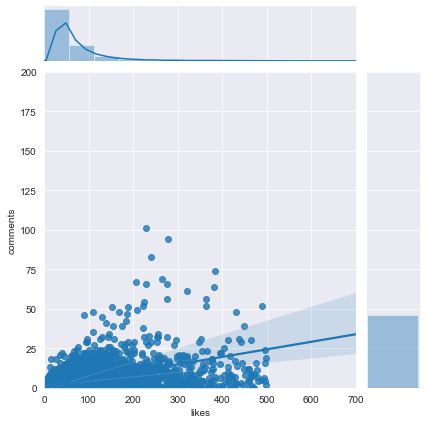

In [50]:
# relationship between number of likes and comments
sns.jointplot(x='likes', y='comments', data=df, kind='reg')
plt.xlim(0, 700)
plt.ylim(0, 200)

Text(0, 0.5, 'Average number of comments')

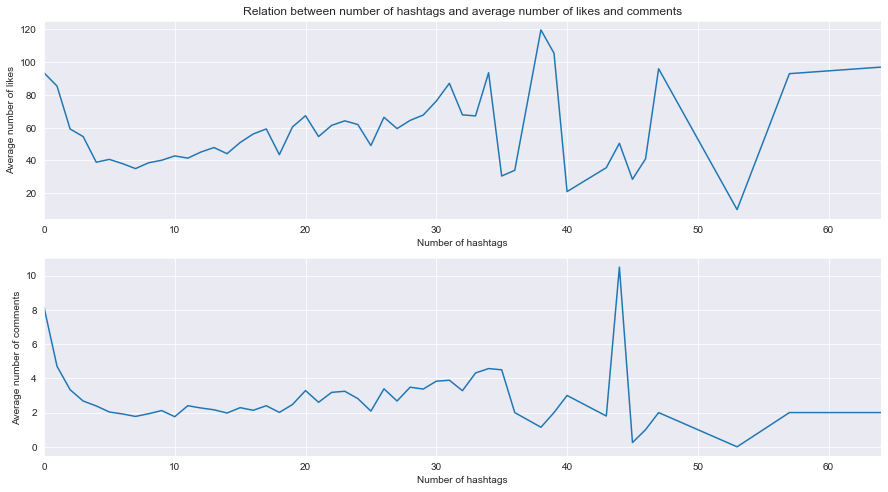

In [51]:
# relationship between average number of likes and hashtags for each different hairstyle

#avgClusters = df.groupby('cluster').mean()[['comments', 'likes', 'hashtagsNum']]
#sns.jointplot(x='likes', y='hashtagsNum', data=avgClusters, kind='reg')

plt.subplot(2, 1, 1)
df.groupby('hashtagsNum').mean()['likes'].plot(figsize=(15, 8))
plt.title('Relation between number of hashtags and average number of likes and comments')
plt.xlabel('Number of hashtags')
plt.ylabel('Average number of likes')

plt.subplot(2, 1, 2)
df.groupby('hashtagsNum').mean()['comments'].plot(figsize=(15, 8))
plt.xlabel('Number of hashtags')
plt.ylabel('Average number of comments')

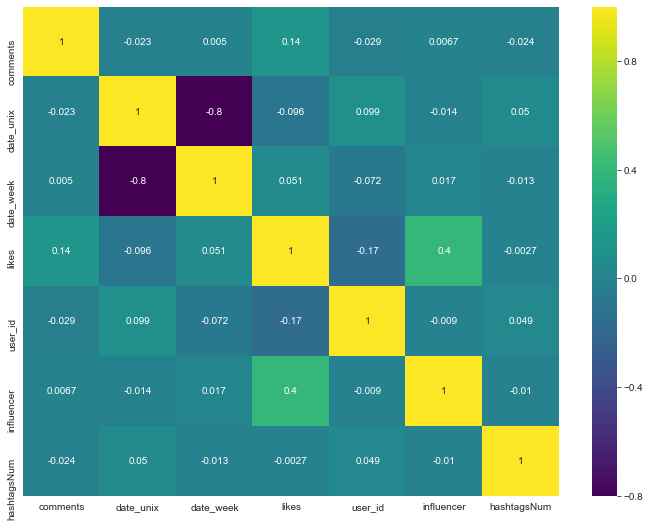

In [83]:
# heatmap with new data (hashtagsNum)
# interesting correlation => hashtagNum-likes, hashtagNum-comments
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [26]:
# extract all different hashtags into dictionary
hashtags = dict()

def extractHashtag(lista):
    for hasht in lista:
        if hasht not in hashtags:
            hashtags[hasht] = 1
        else:
            hashtags[hasht] += 1

df['hashtags'].apply(lambda var: extractHashtag(var))
len(hashtags)

35911

In [27]:
# convert hashtags dictionary into dataframe
dfHashtags = pd.DataFrame.from_dict(hashtags, orient='index', columns=['hashtag'])
#dfHashtags = pd.DataFrame({'hashtag': hashtags.keys(), 'count': hashtags.values()})
dfHashtags.head()

,hashtag
#shooting,30
#photography,139
#studiophotography,3
#peoplephotography,2
#portrait,49


Text(0.5, 1.0, 'Top 10 most popular hashtags')

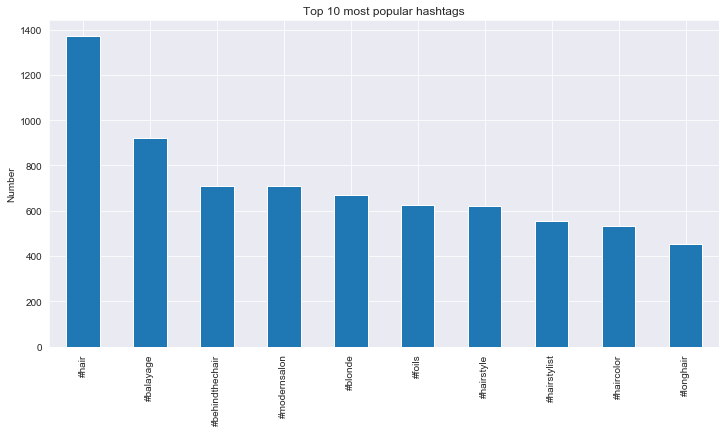

In [53]:
# top 10 most popular hashtags
popularHashs = dfHashtags.nlargest(10, 'hashtag').plot(figsize=(12, 6), kind='bar', legend=None)
plt.ylabel('Number')
plt.title('Top 10 most popular hashtags')

In [29]:
# make new dataframe, with one row for each of the hashtags in list of hashtags
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

dfNew = explode(df, ['hashtags'], fill_value='', preserve_index=True)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125737 entries, 0 to 9999
Data columns (total 13 columns):
cluster          125737 non-null object
comments         125737 non-null int64
date_formated    125737 non-null object
date_month       125737 non-null object
date_unix        125737 non-null int64
date_week        125737 non-null int64
hashtagsNum      125737 non-null int64
id               125737 non-null object
influencer       125737 non-null bool
likes            125737 non-null int64
url              125737 non-null object
user_id          125737 non-null int64
hashtags         125737 non-null object
dtypes: bool(1), int64(6), object(6)
memory usage: 12.6+ MB


In [30]:
# average number of likes for each different hashtag
avgLikesPerHash = dfNew.groupby('hashtags').mean()[['likes', 'comments']].nlargest(10, 'likes')
avgLikesPerHash.head(10)

,likes,comments
hashtags,,
#StarLaceFrontWig,2808.0,19.0
#UniGirls,2808.0,19.0
#UniWigsTrendyTopSocialStar,2808.0,19.0
#ramireztran,499.0,19.0
#AdrianaBill,496.0,16.0
#AdrianaBillVIP,496.0,16.0
#BabyLight,496.0,16.0
#MagicomMoica,496.0,16.0
#NeiaSoares,496.0,16.0


Text(0, 0.5, 'Average number of likes')

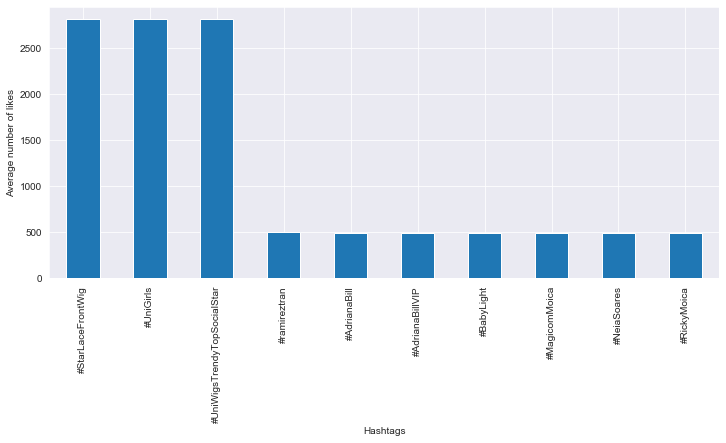

In [54]:
# plot top 10 average number of likes for hashtags
avgLikesPerHash['likes'].plot(figsize=(12, 5), kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Average number of likes')

In [32]:
# average number of comments for each different hashtag
avgCommentsPerHash = dfNew.groupby('hashtags').mean()[['likes', 'comments']].nlargest(10, 'comments')
avgCommentsPerHash.head(10)

,likes,comments
hashtags,,
#champagneatshannons,230.0,101.0
#BerryCurly,241.0,83.0
#CurlCrush,241.0,83.0
#TeamNatural_,241.0,83.0
#bday,241.0,83.0
#curlybeauties,241.0,83.0
#mancrush,241.0,83.0
#greattime,381.0,64.0
#sydneyblogger,381.0,64.0


Text(0, 0.5, 'Average number of comments')

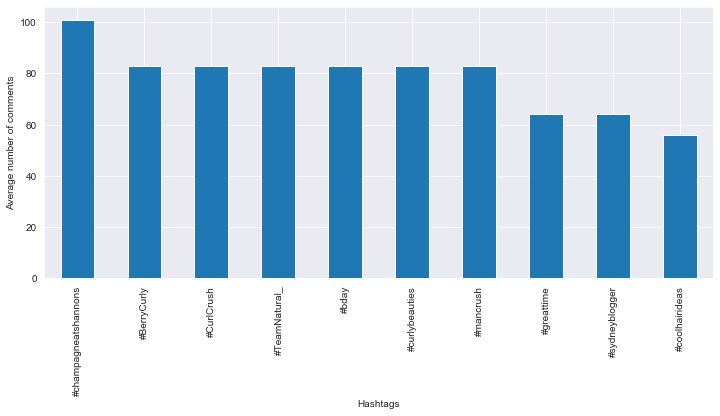

In [55]:
# plot top 10 average number of comments for hashtags
avgCommentsPerHash['comments'].plot(figsize=(12, 5), kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Average number of comments')

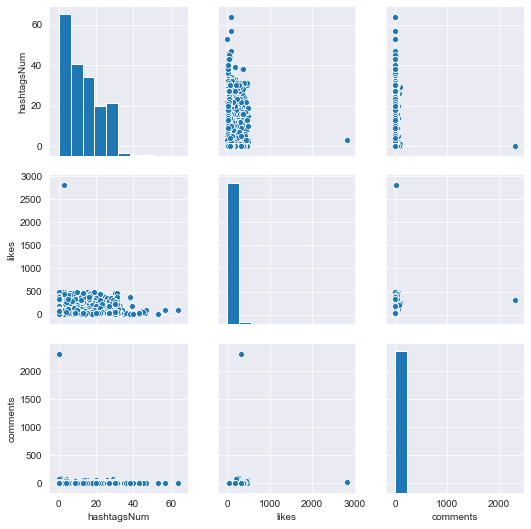

In [56]:
# relations between number of hashtags, likes and comments
sns.pairplot(df[['hashtagsNum', 'likes', 'comments']])

In [35]:
# sum of likes, comments and number of hashtags for each month (there is data for only 3 months...)
dateSums = df.groupby('date_month').sum()[['likes', 'comments', 'hashtagsNum']]
dateSums.head()

,likes,comments,hashtagsNum
date_month,,,
Feb,302994,18488,62700
Jan,166694,9008,32273
Mar,93749,3591,29811


Text(0.5, 1.0, 'Total number of likes, comments and hashtags by month')

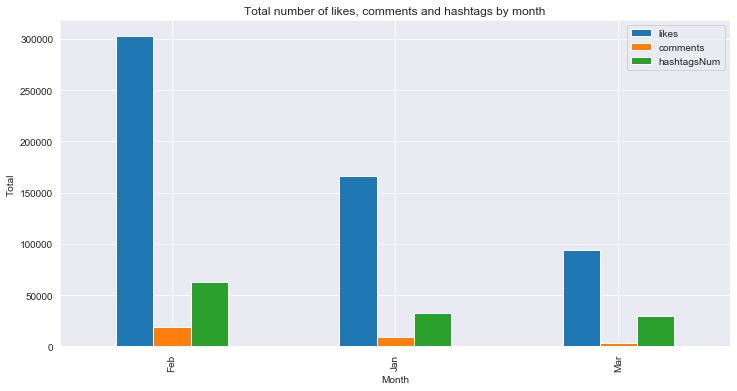

In [57]:
# plotting average number of likes for each month
# i have to change marks on x axis, they have to be in right order (Jan, Feb; not Feb, Jan)
dateSums.plot(figsize=(12, 6), kind='bar')
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Total number of likes, comments and hashtags by month')

In [37]:
# average of likes, comments and number of hashtags for each month (there is data for only 3 months...)
dateAvgs = df.groupby('date_month').mean()[['likes', 'comments', 'hashtagsNum']]
dateAvgs.head()

,likes,comments,hashtagsNum
date_month,,,
Feb,58.572202,3.573942,12.120626
Jan,62.974688,3.403098,12.192293
Mar,43.004128,1.647248,13.674771


Text(0.5, 1.0, 'Average number of likes, comments and hashtags by month')

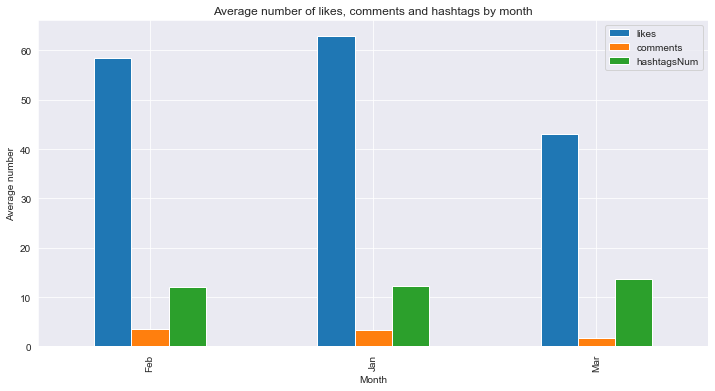

In [58]:
# plotting average number of likes for each month
# i have to change marks on x axis, they have to be in right order (Jan, Feb; not Feb, Jan)
dateAvgs.plot(figsize=(12, 6), kind='bar')
plt.xlabel('Month')
plt.ylabel('Average number')
plt.title('Average number of likes, comments and hashtags by month')

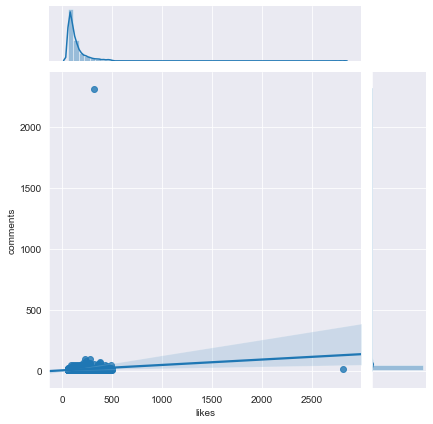

In [59]:
# plot total number of likes and comments for posts above average (num of likes and comments is bigger than average)
# NEMA NEKOG SMISLA....
postsAboveAvg = df[(df['likes'] > df['likes'].mean()) & (df['comments'] > df['comments'].mean())]
sns.jointplot(x='likes', y='comments', data=postsAboveAvg, kind='reg')

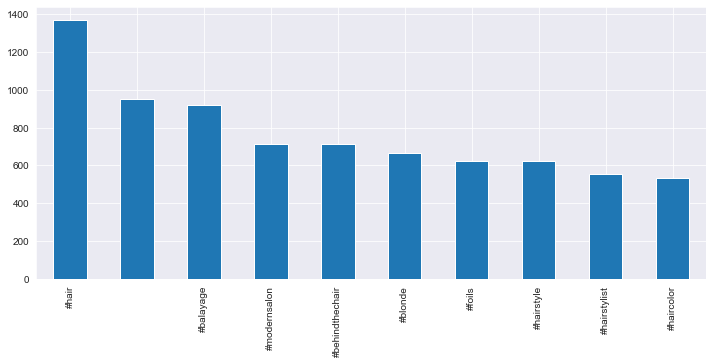

In [60]:
# top 10 most commonly used hashtags
topHashtags = dfNew['hashtags'].value_counts()
topHashtags.head(10).plot(figsize=(12, 5), kind='bar')
#topHashtags.head().index to get list of string values of most commonly used hashtags

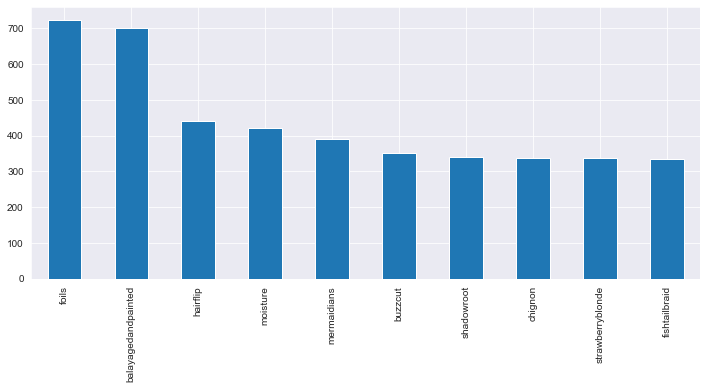

In [61]:
# top 10 hairstyles (by number of posted images)
topHairstyles = df['cluster'].value_counts()
topHairstyles.head(10).plot(figsize=(12, 5), kind='bar')

In [42]:
# function for checking if some cluster is in category of most popular
def isTopCluster(cluster):
    return cluster in topHairstyles.head(10).index

# function for checking if some hashtag is in category of most popular
def isTopHashtag(hashtag):
    return (hashtag in topHashtags.head(6).index) and (len(hashtag) > 0)

# creating new dataframe with posts that has most popular clusters and hashtags
dfTop = dfNew[(dfNew['cluster'].apply(lambda var: isTopCluster(var))) 
              & (dfNew['hashtags'].apply(lambda var: isTopHashtag(var)))]

Text(0.5, 1.0, 'Number of top hairstyle posts with most popular hashtags')

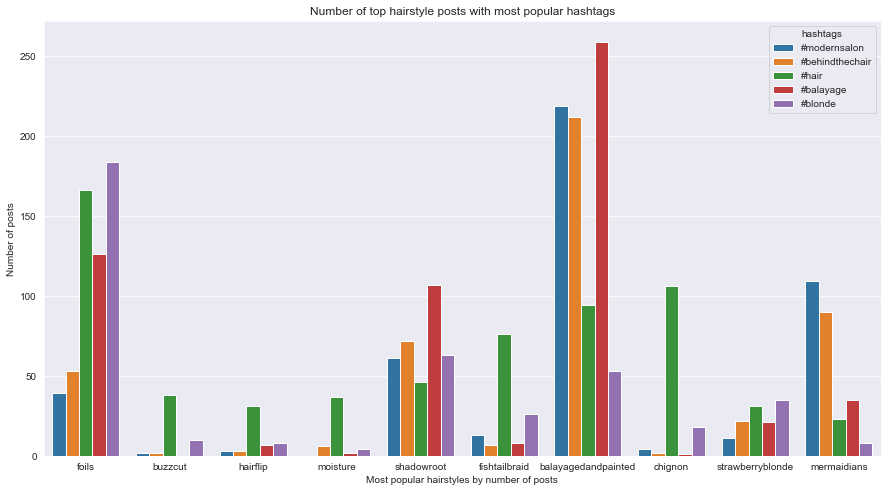

In [92]:
# relation between top 5 hashtags (most commonly used) and top 10 hairstyles (by number of posted images)
# (bar diagram, x axis is top 10 hairstyles and there is one bar for each different of most commonly used hashtags)
plt.figure(figsize=(15, 8))
sns.countplot(x='cluster', data=dfTop, hue='hashtags')
plt.xlabel('Most popular hairstyles by number of posts')
plt.ylabel('Number of posts')
plt.title('Number of top hairstyle posts with most popular hashtags')

In [86]:
# correlation between hashtags (square matrix of hashtags)
# top clusters by total number of likes and comments
topLikeClusters = df.groupby('cluster').sum()[['likes']].nlargest(10, 'likes');
topCommentClusters = df.groupby('cluster').sum()[['comments']].nlargest(10, 'comments')

In [93]:
# function for checking if some cluster is in category of most popular by total number of likes
def isTopLikesCluster(cluster):
    return cluster in topLikeClusters.index

# function for checking if some cluster is in category of most popular by total number of comments
def isTopCommentsCluster(cluster):
    return cluster in topCommentClusters.index

# creating new dataframe with posts that has most popular clusters (by total number of likes) and hashtags
dfTopLikes = dfNew[(dfNew['cluster'].apply(lambda var: isTopLikesCluster(var)))
                  & (dfNew['hashtags'].apply(lambda var: isTopHashtag(var)))]

Text(0.5, 1.0, 'Number of top hairstyle by total number of likes with most popular hashtags')

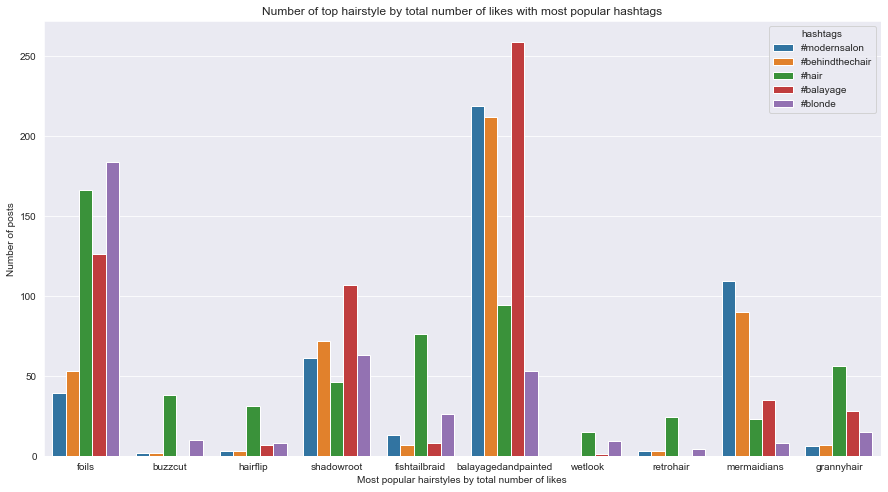

In [94]:
# relation between top 5 hashtags (most commonly used) and top 10 hairstyles (by total number of likes)
# (bar diagram, x axis is top 10 hairstyles and there is one bar for each different of most commonly used hashtags)
plt.figure(figsize=(15, 8))
sns.countplot(x='cluster', data=dfTopLikes, hue='hashtags')
plt.xlabel('Most popular hairstyles by total number of likes')
plt.ylabel('Number of hashtags')
plt.title('Number of top hairstyle by total number of likes with most popular hashtags')

In [96]:
# creating new dataframe with posts that has most popular clusters (by total number of comments) and hashtags
dfTopComments = dfNew[(dfNew['cluster'].apply(lambda var: isTopCommentsCluster(var)))
                  & (dfNew['hashtags'].apply(lambda var: isTopHashtag(var)))]

Text(0.5, 1.0, 'Number of top hairstyles by total number of comments with most popular hashtags')

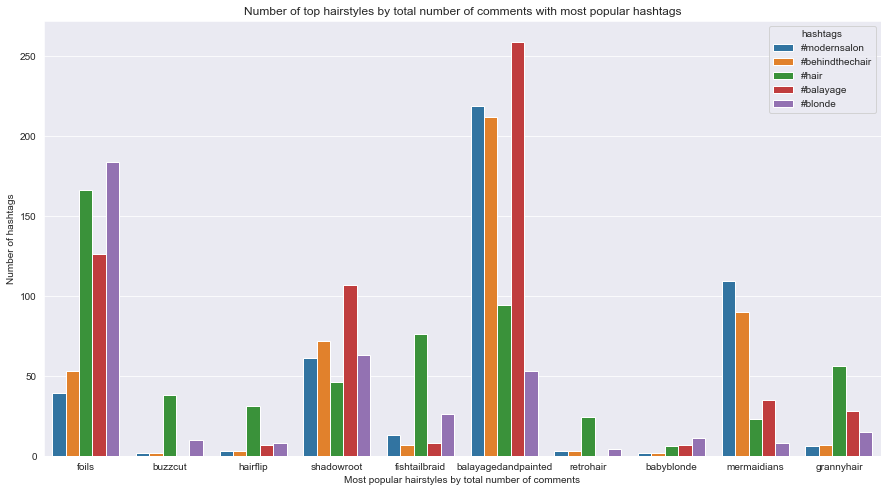

In [97]:
# relation between top 5 hashtags (most commonly used) and top 10 hairstyles (by total number of comments)
# (bar diagram, x axis is top 10 hairstyles and there is one bar for each different of most commonly used hashtags)
plt.figure(figsize=(15, 8))
sns.countplot(x='cluster', data=dfTopComments, hue='hashtags')
plt.xlabel('Most popular hairstyles by total number of comments')
plt.ylabel('Number of hashtags')
plt.title('Number of top hairstyles by total number of comments with most popular hashtags')

Text(0.5, 1, 'Correlation between number of posts, likes and comments by Instagram profile')

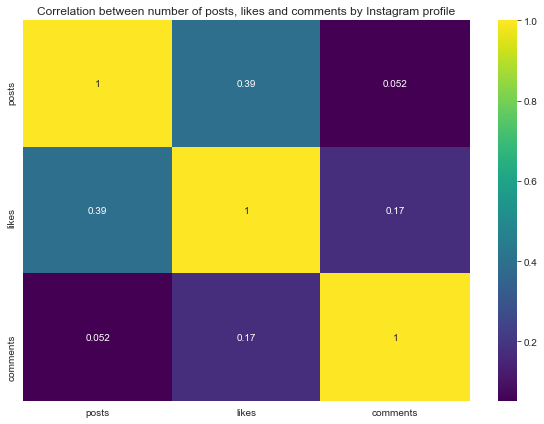

In [113]:
# correlation between number of posts by each user and total number of likes and comments for that user
postNums = df.groupby('user_id').count()['cluster']
likes = df.groupby('user_id').sum()['likes']
comments = df.groupby('user_id').sum()['comments']

data = {'posts': list(postNums),
        'likes': list(likes),
        'comments': list(comments)}

dfPostsLikesComms = pd.DataFrame(data)
dfPostsLikesComms.head(10)

plt.figure(figsize=(10, 7))
sns.heatmap(dfPostsLikesComms.corr(), annot=True, cmap='viridis')
plt.title('Correlation between number of posts, likes and comments by Instagram profile')

In [232]:
# PRISTUP 1, BEZUSPESAN
# correlation between hashtags (top 50 most commonly used)
# there are more that 30 thousand different hashtags, it would be very slow to create correlation matrix of all data
#popularTags = dfHashtags.nlargest(50, 'hashtag').index
#posts = df['id']

# create dataframe with one row for each post, and one column for each different hashtag (I do it just for 30 tags...)
dfTags = pd.DataFrame(columns=popularTags, index=posts)
dfTags = dfTags.fillna(value=0)
#temp = list(df[df['id'] == 'BOuvqVnA8or']['hashtags'])[0]

# fill dataframe with ones at specific positions
#def isHashtagInPost(post, hashtag):
#    return hashtag in list(df[df['id'] == post]['hashtags'])

#for post in posts:
#    for hashtag in popularTags:
#        if isHashtagInPost(post, hashtag):
#            dfTags.at[post, hashtag] = 1

#postTags = dfNew[['id', 'hashtags']]

#for row in postTags.values:
#    dfTags.at[row[0], row[1]] = 1

,#hair,#balayage,#behindthechair,#modernsalon,#blonde,#foils,#hairstyle,#hairstylist,#haircolor,#longhair,...,#headpieces,#shorthair,#wetlook,#mermaidians,#fingerwaves,#grannyhair,#hairpainting,#updo,#instahair,#happynewyear
id,,,,,,,,,,,,,,,,,,,,,
BOuvqVnA8or,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOuxiZXBee-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOvI621jm4n,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOvSR4OgxAq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOuzqkSAO_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
# IDEA -> find correlation between top 20 most popular hashtags
# top 20 most popular tags
popularTags = dfHashtags.nlargest(20, 'hashtag').index

# matrix -> rows = post ids, columns = popular hashtags
dfPostTags = dfNew.groupby('id')['hashtags'].value_counts().unstack().fillna(0).astype(int)
fPostTags.sum()

NameError: name 'fPostTags' is not defined

In [260]:
# selekcija najpopularnijih
dfPostTags = dfPostTags[popularTags]
dfPostTags

hashtags,#hair,#balayage,#behindthechair,#modernsalon,#blonde,#foils,#hairstyle,#hairstylist,#haircolor,#longhair,#braids,#hairstyles,#olaplex,#haircut,#love,#ombre,#balayagedandpainted,#makeup,#hairflip,#blondehair
id,,,,,,,,,,,,,,,,,,,,
BOs-3h4DXjM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-5ffgOPv,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-5gPgGce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-GuUhr7e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-IjIg2nF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-OkLjNby,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-PmABpSu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-V4RjUP9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOs-W4CD7oy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
#transponovanje i mnozenje
hashsMatrix = dfPostTags.T.dot(dfPostTags)

In [ ]:
# plotting
plt.figure(figsize=(16, 14))
sns.heatmap(hashsMatrix.corr(), annot=True, cmap='viridis')
plt.title('Correlation between top 20 most popular hashtags')